In [1]:
# Importing Pandas an Numpy Libraries to use on manipulating our Data
import pandas as pd
import numpy as np
import sys
import warnings
# To Preproccesing our data
from sklearn.preprocessing import LabelEncoder
# To fill missing values
from sklearn.impute import SimpleImputer
# To Split our train data
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc,mean_squared_error as MSE

import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 20})

# To Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns

# To Train our data
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")

/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
data = pd.read_csv('../data/AdSmartABdata.csv')

In [3]:
df=data.copy()

In [4]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [5]:
df.dtypes

auction_id     object
experiment     object
date           object
hour            int64
device_make    object
platform_os     int64
browser        object
yes             int64
no              int64
dtype: object

In [6]:
df_non_numerical=df.select_dtypes(include=['object'])
df_non_numerical

,auction_id,experiment,date,device_make,browser
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,Generic Smartphone,Chrome Mobile
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,Generic Smartphone,Chrome Mobile
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,E5823,Chrome Mobile WebView
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,Samsung SM-A705FN,Facebook
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,Generic Smartphone,Chrome Mobile
...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,Generic Smartphone,Chrome Mobile
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,Generic Smartphone,Chrome Mobile
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,Generic Smartphone,Chrome Mobile
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,Samsung SM-A515F,Samsung Internet


In [7]:
df.columns.tolist()

['auction_id',
 'experiment',
 'date',
 'hour',
 'device_make',
 'platform_os',
 'browser',
 'yes',
 'no']

- Split data by browser and platform_os, and version each split as a new version of the data in dvc.

Split data by browser

In [8]:
# use the data where respondents are not neutral
df_browser= df[['experiment','date','hour','device_make','browser','yes','no']]
df_browser.query('not (yes == 0 & no == 0)',inplace=True)


In [9]:
df_browser

,experiment,date,hour,device_make,browser,yes,no
2,exposed,2020-07-05,2,E5823,Chrome Mobile WebView,0,1
16,exposed,2020-07-04,16,Generic Smartphone,Chrome Mobile,1,0
20,exposed,2020-07-06,8,Generic Smartphone,Chrome Mobile,0,1
23,control,2020-07-08,4,Samsung SM-A202F,Facebook,1,0
27,control,2020-07-03,15,Generic Smartphone,Chrome Mobile,0,1
...,...,...,...,...,...,...,...
8059,exposed,2020-07-05,21,Generic Smartphone,Chrome Mobile,1,0
8063,exposed,2020-07-04,1,Generic Smartphone,Chrome Mobile,1,0
8064,control,2020-07-09,7,Generic Smartphone,Chrome Mobile,0,1
8069,control,2020-07-10,16,Generic Smartphone,Chrome Mobile,0,1


In [10]:
# convert the data and experiment to numerical 
df_browser_non_num=df_browser.select_dtypes(include=['object'])
df_browser_non_num['date_1']= pd.to_datetime(df_browser_non_num['date'])
df_browser_non_num['experiment_1'] = df_browser_non_num['experiment'].map({'exposed': 1, 
                                    'control': 0})
df_browser_non_num['experiment'].value_counts()

exposed    657
control    586
Name: experiment, dtype: int64

In [11]:
df_browser_non_num.drop(['experiment',	'date'], axis=1, inplace=True)

In [12]:
categorical_column= df_browser_non_num.select_dtypes(include='object').columns.tolist()
categorical_column

['device_make', 'browser']

In [13]:
# label_encoder  device_maker and browser
label_encoder=LabelEncoder()

# Encode labels in column 'device_make'.
df_browser_non_num['device_make']= label_encoder.fit_transform(df_browser_non_num['device_make'])
df_browser_non_num['browser']= label_encoder.fit_transform(df_browser_non_num['browser'])
# rename columns
df_browser_non_num=df_browser_non_num.rename({'date_1': 'date',
                         'experiment_1': 'experiment'}, axis='columns')
df_browser_non_num.reset_index(drop=True)

,device_make,browser,date,experiment
0,4,2,2020-07-05,1
1,13,1,2020-07-04,1
2,13,1,2020-07-06,1
3,43,4,2020-07-08,0
4,13,1,2020-07-03,0
...,...,...,...,...
1238,13,1,2020-07-05,1
1239,13,1,2020-07-04,1
1240,13,1,2020-07-09,0
1241,13,1,2020-07-10,0


In [14]:
df_browser_non_num[['hour','yes','no']]= df_browser[['hour','yes','no']]
df_browser_non_num
# rename the columns
columns=[ 'date', 'hour','device_make', 'browser','experiment','yes',	'no']
df_browser_non_num= df_browser_non_num[columns]
df_browser_non_num
df_browser_non_num.reset_index(drop=True)

,date,hour,device_make,browser,experiment,yes,no
0,2020-07-05,2,4,2,1,0,1
1,2020-07-04,16,13,1,1,1,0
2,2020-07-06,8,13,1,1,0,1
3,2020-07-08,4,43,4,0,1,0
4,2020-07-03,15,13,1,0,0,1
...,...,...,...,...,...,...,...
1238,2020-07-05,21,13,1,1,1,0
1239,2020-07-04,1,13,1,1,1,0
1240,2020-07-09,7,13,1,0,0,1
1241,2020-07-10,16,13,1,0,0,1


In [15]:
df_browser_non_num.isnull().sum()

date           0
hour           0
device_make    0
browser        0
experiment     0
yes            0
no             0
dtype: int64

Save the dataset

In [16]:
# '../data/AdSmartABdata.csv'
df_browser_non_num.to_csv('../data/AdSmartABdata_browser.csv')

Split data by platform_os

In [17]:
df_platform= df[['experiment','date','hour','device_make','platform_os','yes','no']]
df_platform.query('not (yes == 0 & no == 0)',inplace=True)

In [18]:
df_platform

,experiment,date,hour,device_make,platform_os,yes,no
2,exposed,2020-07-05,2,E5823,6,0,1
16,exposed,2020-07-04,16,Generic Smartphone,6,1,0
20,exposed,2020-07-06,8,Generic Smartphone,6,0,1
23,control,2020-07-08,4,Samsung SM-A202F,6,1,0
27,control,2020-07-03,15,Generic Smartphone,6,0,1
...,...,...,...,...,...,...,...
8059,exposed,2020-07-05,21,Generic Smartphone,6,1,0
8063,exposed,2020-07-04,1,Generic Smartphone,6,1,0
8064,control,2020-07-09,7,Generic Smartphone,6,0,1
8069,control,2020-07-10,16,Generic Smartphone,6,0,1


- label encoding

In [19]:
# convert the data and experiment to numerical 
df_platform_non_num=df_platform.select_dtypes(include=['object'])
df_platform_non_num['date_1']= pd.to_datetime(df_platform_non_num['date'])
df_platform_non_num['experiment_1'] = df_platform_non_num['experiment'].map({'exposed': 1, 
                                    'control': 0})
# df_platform_non_num['experiment'].value_counts()

# df_platform_non_num=df_platform_non_num.reset_index(drop=True)
df_platform_non_num.drop(['date','experiment' ],axis=1,inplace=True)

In [20]:
# Encode labels in column 'device_make'.
df_platform_non_num['device_make']= label_encoder.fit_transform(df_platform_non_num['device_make'])
df_platform_non_num['platform_os']=df_platform['platform_os']

In [21]:
df_platform_non_num

,device_make,date_1,experiment_1,platform_os
2,4,2020-07-05,1,6
16,13,2020-07-04,1,6
20,13,2020-07-06,1,6
23,43,2020-07-08,0,6
27,13,2020-07-03,0,6
...,...,...,...,...
8059,13,2020-07-05,1,6
8063,13,2020-07-04,1,6
8064,13,2020-07-09,0,6
8069,13,2020-07-10,0,6


In [22]:
df_platform_non_num[['hour','yes','no']]= df_browser[['hour','yes','no']]
df_platform_non_num
# rename the columns
columns=[ 'date_1', 'hour','device_make', 'platform_os','experiment_1','yes',	'no']
df_platform_non_num= df_platform_non_num[columns]
df_platform_non_num=df_platform_non_num.rename({'date_1': 'date',
                         'experiment_1': 'experiment'}, axis='columns')
df_platform_non_num.reset_index(drop=True)

,date,hour,device_make,platform_os,experiment,yes,no
0,2020-07-05,2,4,6,1,0,1
1,2020-07-04,16,13,6,1,1,0
2,2020-07-06,8,13,6,1,0,1
3,2020-07-08,4,43,6,0,1,0
4,2020-07-03,15,13,6,0,0,1
...,...,...,...,...,...,...,...
1238,2020-07-05,21,13,6,1,1,0
1239,2020-07-04,1,13,6,1,1,0
1240,2020-07-09,7,13,6,0,0,1
1241,2020-07-10,16,13,6,0,0,1


In [23]:
df_platform_non_num

,date,hour,device_make,platform_os,experiment,yes,no
2,2020-07-05,2,4,6,1,0,1
16,2020-07-04,16,13,6,1,1,0
20,2020-07-06,8,13,6,1,0,1
23,2020-07-08,4,43,6,0,1,0
27,2020-07-03,15,13,6,0,0,1
...,...,...,...,...,...,...,...
8059,2020-07-05,21,13,6,1,1,0
8063,2020-07-04,1,13,6,1,1,0
8064,2020-07-09,7,13,6,0,0,1
8069,2020-07-10,16,13,6,0,0,1


In [25]:
# save the platform dataset
df_platform_non_num.to_csv('../data/AdSmartABdata_platform.csv')

In [26]:
# '../data/AdSmartABdata.csv'
df_plf=pd.read_csv('../data/AdSmartABdata_platform.csv')
df_plf

,Unnamed: 0,date,hour,device_make,platform_os,experiment,yes,no
0,2,2020-07-05,2,4,6,1,0,1
1,16,2020-07-04,16,13,6,1,1,0
2,20,2020-07-06,8,13,6,1,0,1
3,23,2020-07-08,4,43,6,0,1,0
4,27,2020-07-03,15,13,6,0,0,1
...,...,...,...,...,...,...,...,...
1238,8059,2020-07-05,21,13,6,1,1,0
1239,8063,2020-07-04,1,13,6,1,1,0
1240,8064,2020-07-09,7,13,6,0,0,1
1241,8069,2020-07-10,16,13,6,0,0,1


<b>`For each version of the data do the following:`</b> 
- Split the data into 70% training, 20% validation, and 10% test sets. 
- Based on the reading material provided, apply machine learning to the training data. 
- Train a machine learning model using 5-fold cross validation using the following 3 different algorithms:
- Logistic Regression 
- Decision Trees
- XGBoost
- RandomForest


<b>` Split the data into 70% training, 20% validation, and 10% test sets.`</b>   

In [27]:

X= df_plf[['hour', 'device_make', 'platform_os', 'experiment']]
# X= df_plf[['hour', 'device_make']]
X

,hour,device_make,platform_os,experiment
0,2,4,6,1
1,16,13,6,1
2,8,13,6,1
3,4,43,6,0
4,15,13,6,0
...,...,...,...,...
1238,21,13,6,1
1239,1,13,6,1
1240,7,13,6,0
1241,16,13,6,0


In [28]:
# Define Y (This is the value we will predict)
y = df_plf["yes"]
y

0       0
1       1
2       0
3       1
4       0
       ..
1238    1
1239    1
1240    0
1241    0
1242    0
Name: yes, Length: 1243, dtype: int64

In [29]:
y.size

1243

<b>`Now is the time to split the data to train and test sets`<b>
- Split the data into 70% training, 20% validation, and 10% test sets.

In [30]:

X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7,random_state = 365)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, train_size=0.666,random_state=365)

In [31]:

print('total data points:', X.size)
print('X_train:',X_train.size)
print('X_test:',X_test.size)
print('X_validate:',X_valid.size)

total data points: 4972
X_train: 3480
X_test: 500
X_validate: 992


## Training the models

* Random Forest -> Supervised Learning – Classification/Regression
> Random forests or ‘random decision forests’ is an ensemble learning method, combining multiple algorithms to generate better results for classification, regression and other tasks. Each individual classifier is weak, but when combined with others, can produce excellent results. It can handle both continous and categorical variables.
* Desicion Tree -> Supervised Learning – Classification/Regression
> A decision tree is a flow-chart-like tree structure that uses a branching method to illustrate every possible outcome of a decision. Each node within the tree represents a test on a specific variable – and each branch is the outcome of that test.

* Logistic Regression Classifier -> Supervised learning – Classification
> Logistic regression focuses on estimating the probability of an event occurring based on the previous data provided. It is used to cover a binary dependent variable, that is where only two values, 0 and 1, represent outcomes. - Uses Sigmoid in the output layer in binary classification.

* XGBoost (have acurate predictions)
>  It is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework.

Random Forest

In [107]:
# Define Random Forest Model


rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None],
    'criterion':['gini', 'entropy', 'log_loss']
    }

cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train,y_train.values.ravel())

# # We fit our model with our train data
# rfc.fit(X_train,y_train)

# # Then predict results from X_test data
# pred_rf=rf.predict(X_test)



GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [108]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [109]:
display(cv)

Best parameters are: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}


0.54 + or -0.024 for the {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 5}
0.56 + or -0.02 for the {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 10}
0.563 + or -0.016 for the {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 50}
0.564 + or -0.009 for the {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 100}
0.561 + or -0.011 for the {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 250}
0.582 + or -0.028 for the {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 5}
0.552 + or -0.011 for the {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 10}
0.583 + or -0.006 for the {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}
0.563 + or -0.01 for the {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 100}
0.575 + or -0.017 for the {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 250}
0.553 + or -0.022 for the {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 5

In [110]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(max_depth=4, n_estimators= 100,criterion='gini')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.432


In [111]:

feature_imp = pd.Series(clf.feature_importances_,index=clf.feature_names_in_).sort_values(ascending=False)
feature_imp

device_make    0.474170
hour           0.451653
experiment     0.056869
platform_os    0.017307
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


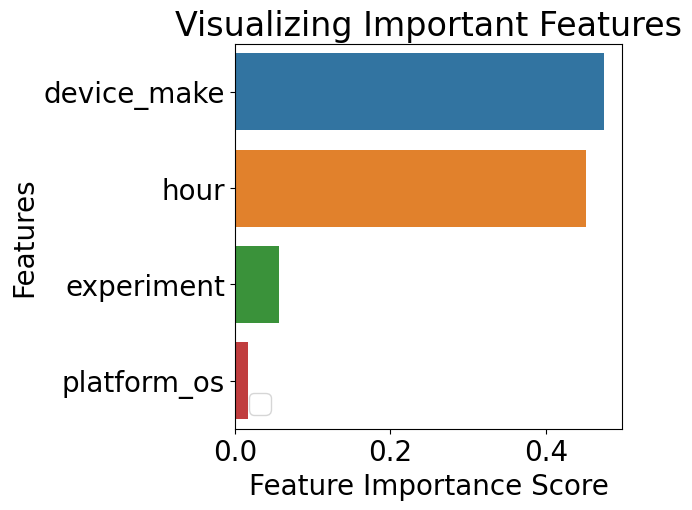

In [112]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [113]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

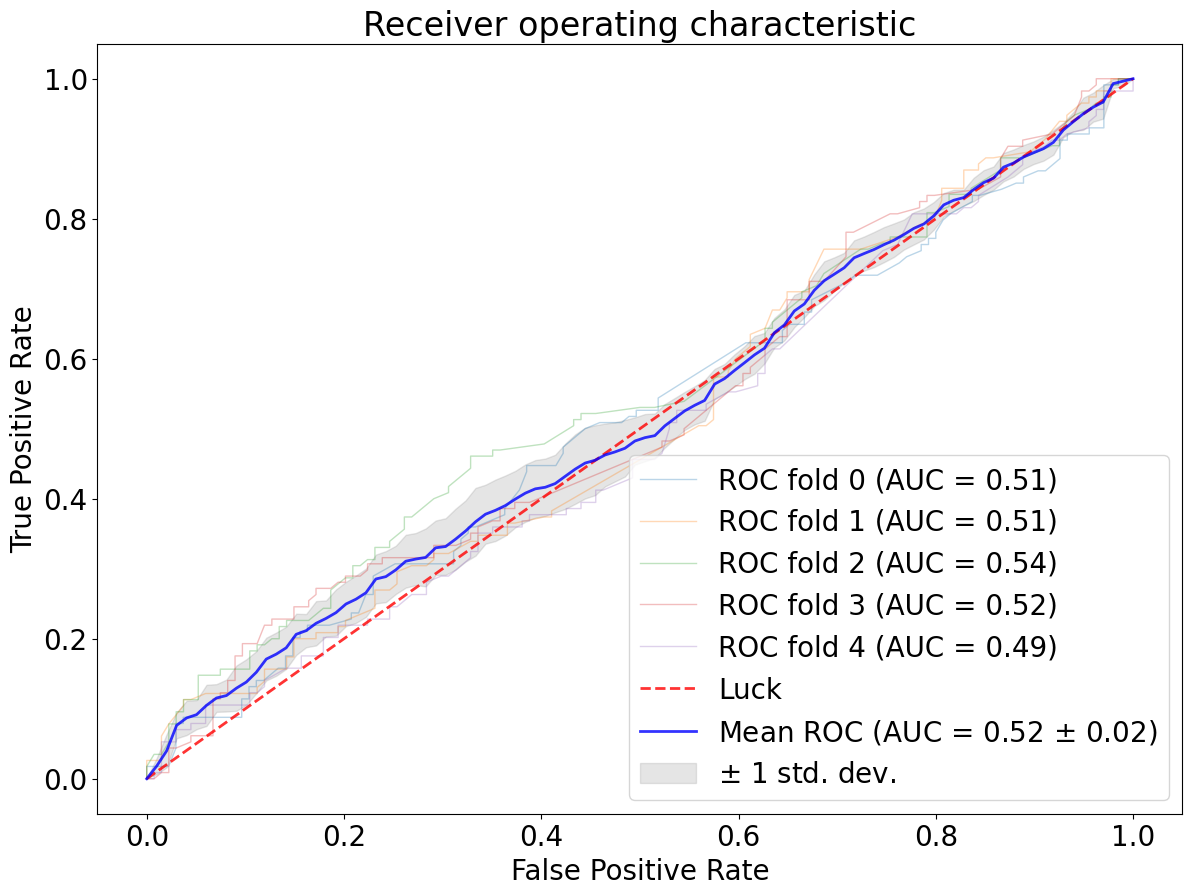

,AUC Train,AUC Test
0,0.671348,0.512216
1,0.655223,0.511421
2,0.662904,0.544192
3,0.655105,0.520915
4,0.662629,0.490050


In [114]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

<b>`Decision Tree`<b>

In [115]:
# Define Decision Tree Model
dt = DecisionTreeClassifier()
# We fit our model with our train data
dt.fit(X_train, y_train)
# Then predict results from X_test data
pred_dt = dt.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, pred_dt))
print(confusion_matrix(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.45      0.63      0.52        59
           1       0.48      0.30      0.37        66

    accuracy                           0.46       125
   macro avg       0.46      0.47      0.45       125
weighted avg       0.46      0.46      0.44       125

[[37 22]
 [46 20]]


<b>`Random forest classifier continuation`<b>

In [7]:
from sklearn.model_selection import cross_validate, KFold
from sklearn import tree
clf=RandomForestClassifier()
kf = KFold(n_splits=5, shuffle=False)
cv_results = cross_validate(
    estimator=clf,
    X=X_train,
    y=y_train,
    n_jobs=4,
    cv=kf,
    return_estimator=True,
)
print("%0.2f accuracy with a standard deviation of %0.2f" % (
    cv_results['test_score'].mean(),
    cv_results['test_score'].std(),
))
# for est in cv_results['estimator']:
#     tree.plot_tree(est, filled=True, feature_names=['hour', 'device_make', 'platform_os', 'experiment']
#     , class_names=['hour', 'device_make', 'platform_os', 'experiment'])
#     plt.show();

0.55 accuracy with a standard deviation of 0.03


Logistic Regression

In [9]:
# Define Logistic Regression Model
log = LogisticRegression()
# We fit our model with our train data
log.fit(X_train, y_train)
# Then predict results from X_test data
pred_log = log.predict(X_test)


XGBoost

In [118]:
# Define XGBoost Model
from xgboost import cv
import xgboost as xgb

# instantiate the classifier 
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.01,
                'max_depth': 5, 'alpha': 10}
xgb_clf = XGBClassifier(**params)

data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)


xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10, metrics = 'rmse',
                     as_pandas=True, seed=123)

xgb_cv.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.499966,0.000029,0.499992,0.000046
1,0.499925,0.000052,0.499977,0.000095
2,0.499864,0.000069,0.499959,0.000145
3,0.499800,0.000103,0.499952,0.000178
4,0.499735,0.000129,0.499921,0.000223


In [119]:
print((xgb_cv["test-rmse-mean"]).tail(1))

34    0.499701
Name: test-rmse-mean, dtype: float64


In [120]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[23:14:38] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Feature importance with XGBoost

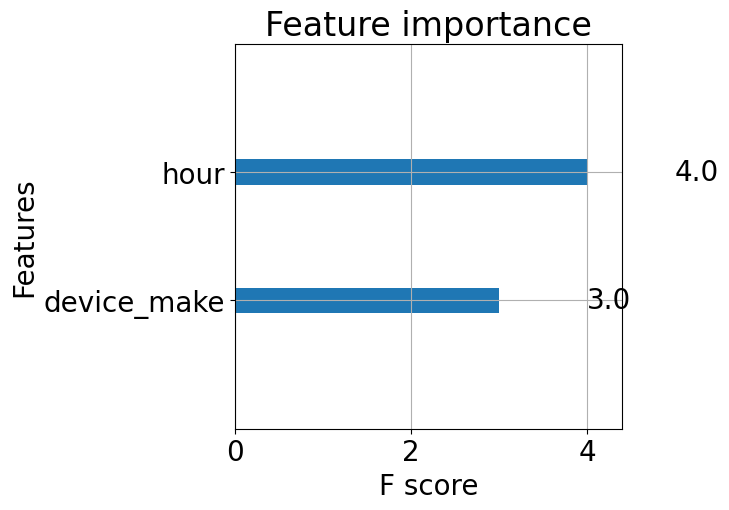

In [121]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()